https://keras.io/examples/timeseries/timeseries_weather_forecasting/

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [17]:
data = pd.read_csv('extracted\low\FRA.csv')

In [18]:
df = data[['dt','Temperature']]

In [19]:
len(df)/2

159132.0

In [20]:
train_data = df[:32028]
test_data = df[32028:]

In [21]:
data.columns

Index(['dt', 'Temperature 2 m elevation corrected',
       'Growing Degree Days 2 m elevation corrected', 'Temperature 1000 mb',
       'Temperature 850 mb', 'Temperature 700 mb', 'Precipitation Total sfc',
       'Snowfall Amount sfc', 'Relative Humidity 2 m', 'Wind Speed 10 m',
       'Wind Direction 10 m', 'Wind Speed 80 m', 'Wind Direction 80 m',
       'Wind Gust sfc', 'Wind Speed 900 mb', 'Wind Direction 900 mb',
       'Wind Speed 850 mb', 'Wind Direction 850 mb', 'Wind Speed 700 mb',
       'Wind Direction 700 mb', 'Wind Speed 500 mb', 'Wind Direction 500 mb',
       'Cloud Cover Total sfc', 'Cloud Cover High high cld lay',
       'Cloud Cover Medium mid cld lay', 'Cloud Cover Low low cld lay',
       'CAPE 180-0 mb above gnd', 'Sunshine Duration sfc',
       'Shortwave Radiation sfc', 'Direct Shortwave Radiation sfc',
       'Diffuse Shortwave Radiation sfc', 'Mean Sea Level Pressure MSL',
       'Geopotential Height 1000 mb', 'Geopotential Height 850 mb',
       'Geopotential

Text(0, 0.5, 'Wind Velocity [m/s]')

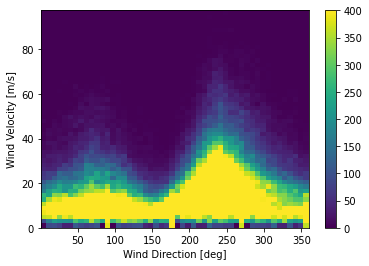

In [22]:
plt.hist2d(data['Wind Direction 10 m'], data['Wind Speed 10 m'], bins=(50, 50), vmax=400)
plt.colorbar()
plt.xlabel('Wind Direction [deg]')
plt.ylabel('Wind Velocity [m/s]')

In [23]:
wv = data.pop('Wind Speed 10 m')
max_wv = wv.max()

# Convert to radians.
wd_rad = data.pop('Wind Direction 10 m')*np.pi / 180

# Calculate the wind x and y components.
data['Wx'] = wv*np.cos(wd_rad)
data['Wy'] = wv*np.sin(wd_rad)

# Calculate the max wind x and y components.
data['max Wx'] = max_wv*np.cos(wd_rad)
data['max Wy'] = max_wv*np.sin(wd_rad)

(-64.7999942003094, 63.720024820645804, -92.87999937910875, 66.96000476453716)

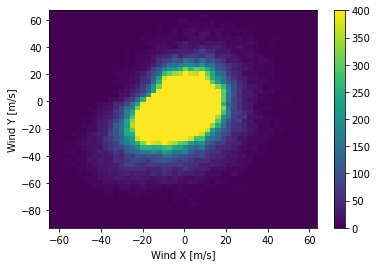

In [24]:
plt.hist2d(data['Wx'], data['Wy'], bins=(50, 50), vmax=400)
plt.colorbar()
plt.xlabel('Wind X [m/s]')
plt.ylabel('Wind Y [m/s]')
ax = plt.gca()
ax.axis('tight')

In [25]:
data.columns

Index(['dt', 'Temperature 2 m elevation corrected',
       'Growing Degree Days 2 m elevation corrected', 'Temperature 1000 mb',
       'Temperature 850 mb', 'Temperature 700 mb', 'Precipitation Total sfc',
       'Snowfall Amount sfc', 'Relative Humidity 2 m', 'Wind Speed 80 m',
       'Wind Direction 80 m', 'Wind Gust sfc', 'Wind Speed 900 mb',
       'Wind Direction 900 mb', 'Wind Speed 850 mb', 'Wind Direction 850 mb',
       'Wind Speed 700 mb', 'Wind Direction 700 mb', 'Wind Speed 500 mb',
       'Wind Direction 500 mb', 'Cloud Cover Total sfc',
       'Cloud Cover High high cld lay', 'Cloud Cover Medium mid cld lay',
       'Cloud Cover Low low cld lay', 'CAPE 180-0 mb above gnd',
       'Sunshine Duration sfc', 'Shortwave Radiation sfc',
       'Direct Shortwave Radiation sfc', 'Diffuse Shortwave Radiation sfc',
       'Mean Sea Level Pressure MSL', 'Geopotential Height 1000 mb',
       'Geopotential Height 850 mb', 'Geopotential Height 700 mb',
       'Geopotential Height 500 

C:\Users\Flori\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Flori\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Flori\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Flori\AppData\Local\Pr

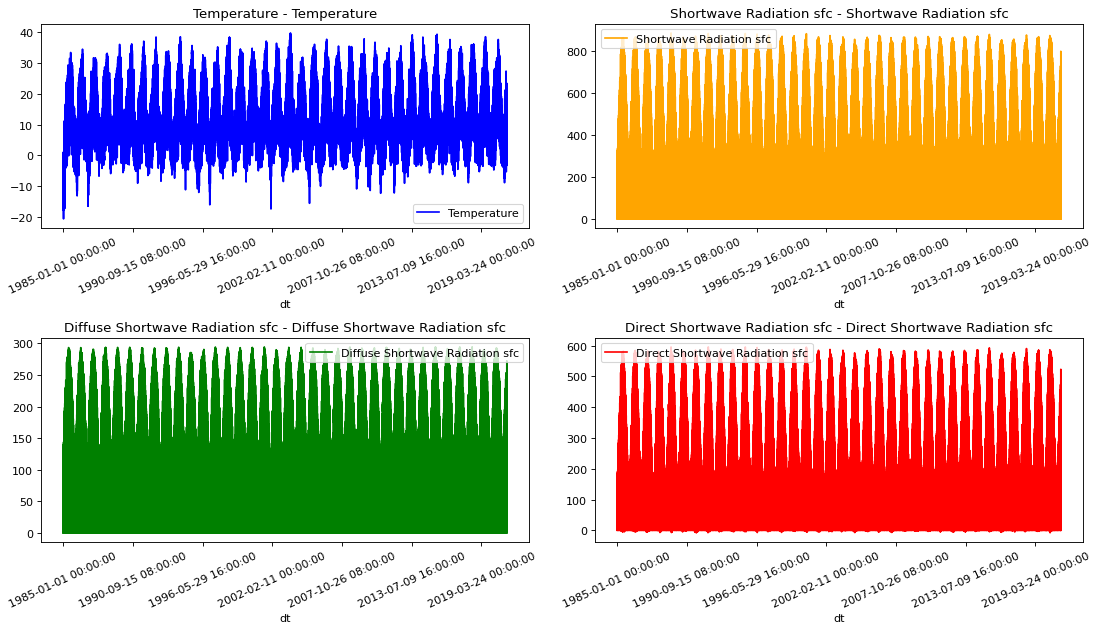

In [26]:
titles = [
    "Temperature",
    "Shortwave Radiation sfc",
    'Diffuse Shortwave Radiation sfc',
    'Direct Shortwave Radiation sfc'
]

feature_keys = [
    "Temperature",
    "Shortwave Radiation sfc",
    'Diffuse Shortwave Radiation sfc',
    'Direct Shortwave Radiation sfc'
]

colors = [
    "blue",
    "orange",
    "green",
    "red",
    "purple",
    "brown",
    "pink",
    "gray",
    "olive",
    "cyan",
]

date_time_key = "dt"

def show_raw_visualization(data):
    time_data = data[date_time_key]
    fig, axes = plt.subplots(
        nrows=2, ncols=2, figsize=(14, 8), dpi=80, facecolor="w", edgecolor="k"
    )
    for i in range(len(feature_keys)):
        key = feature_keys[i]
        c = colors[i % (len(colors))]
        t_data = data[key]
        t_data.index = time_data
        t_data.head()
        ax = t_data.plot(
            ax=axes[i // 2, i % 2],
            color=c,
            title="{} - {}".format(titles[i], key),
            rot=25,
        )
        ax.legend([titles[i]])
    plt.tight_layout()


show_raw_visualization(data)

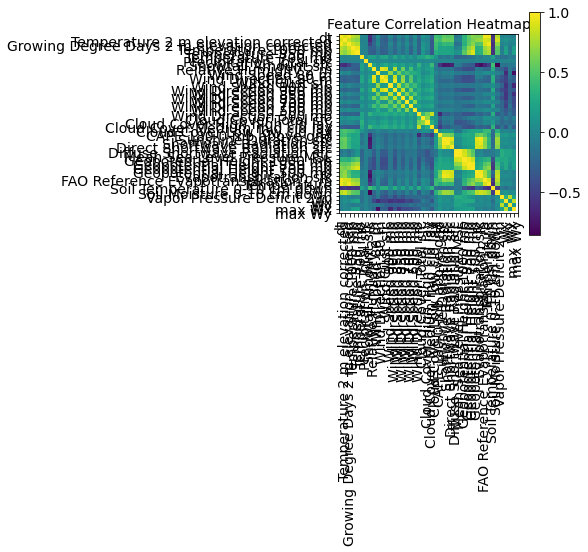

In [72]:
def show_heatmap(data):
    plt.matshow(data.corr())
    plt.xticks(range(data.shape[1]), data.columns, fontsize=14, rotation=90)
    plt.gca().xaxis.tick_bottom()
    plt.yticks(range(data.shape[1]), data.columns, fontsize=14)

    cb = plt.colorbar()
    cb.ax.tick_params(labelsize=14)
    plt.title("Feature Correlation Heatmap", fontsize=14)
    plt.show()


show_heatmap(data)

In [86]:
split_fraction = 0.7
train_split = int(split_fraction * int(df.shape[0]))
step = 1

past = 1000
future = 100
learning_rate = 0.001
batch_size = 256
epochs = 10


def normalize(data, train_split):
    data_mean = data[:train_split].mean(axis=0)
    data_std = data[:train_split].std(axis=0)
    return (data - data_mean) / data_std

In [39]:
print(
    "The selected parameters are:",
    ", ".join([titles[i] for i in [0]]),
)
selected_features = [feature_keys[i] for i in [0]]
features = data[selected_features]
features.index = df[date_time_key]
features.head()

features = normalize(features.values, train_split)
features = pd.DataFrame(features)
features.head()

train_data = features.loc[0 : train_split - 1]
val_data = features.loc[train_split:]

The selected parameters are: Temperature


In [43]:
featues

NameError: name 'featues' is not defined

In [44]:
start = past + future
end = start + train_split

x_train = train_data[[i for i in range(1)]].values
y_train = features.iloc[start:end][[0]]

sequence_length = int(past / step)

In [45]:
dataset_train = keras.preprocessing.timeseries_dataset_from_array(
    x_train,
    y_train,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,
)

In [49]:
x_end = len(val_data) - past - future

label_start = train_split + past + future

x_val = val_data.iloc[:x_end][[i for i in range(1)]].values
y_val = features.iloc[label_start:][[0]]

dataset_val = keras.preprocessing.timeseries_dataset_from_array(
    x_val,
    y_val,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,
)


for batch in dataset_train.take(1):
    inputs, targets = batch

print("Input shape:", inputs.numpy().shape)
print("Target shape:", targets.numpy().shape)

Input shape: (256, 120, 1)
Target shape: (256, 1)


In [50]:
inputs = keras.layers.Input(shape=(inputs.shape[1], inputs.shape[2]))
lstm_out = keras.layers.LSTM(32)(inputs)
outputs = keras.layers.Dense(1)(lstm_out)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss="mse")
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 120, 1)]          0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 32)                4352      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 4,385
Trainable params: 4,385
Non-trainable params: 0
_________________________________________________________________


In [51]:
path_checkpoint = "model_checkpoint.h5"
es_callback = keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=0, patience=5)

modelckpt_callback = keras.callbacks.ModelCheckpoint(
    monitor="val_loss",
    filepath=path_checkpoint,
    verbose=1,
    save_weights_only=True,
    save_best_only=True,
)

history = model.fit(
    dataset_train,
    epochs=epochs,
    validation_data=dataset_val,
    callbacks=[es_callback, modelckpt_callback],
)

Epoch 1/10
887/887 [==============================] - 23s 25ms/step - loss: 0.5494 - val_loss: 0.4597

Epoch 00001: val_loss improved from inf to 0.45971, saving model to model_checkpoint.h5
Epoch 2/10
887/887 [==============================] - 23s 26ms/step - loss: 0.4141 - val_loss: 0.2858

Epoch 00002: val_loss improved from 0.45971 to 0.28584, saving model to model_checkpoint.h5
Epoch 3/10
887/887 [==============================] - 23s 26ms/step - loss: 0.2903 - val_loss: 0.2568

Epoch 00003: val_loss improved from 0.28584 to 0.25676, saving model to model_checkpoint.h5
Epoch 4/10
887/887 [==============================] - 23s 26ms/step - loss: 0.2655 - val_loss: 0.2508

Epoch 00004: val_loss improved from 0.25676 to 0.25085, saving model to model_checkpoint.h5
Epoch 5/10
887/887 [==============================] - 22s 25ms/step - loss: 0.2592 - val_loss: 0.2457

Epoch 00005: val_loss improved from 0.25085 to 0.24573, saving model to model_checkpoint.h5
Epoch 6/10
887/887 [=========

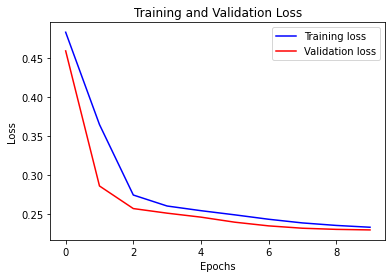

In [52]:
def visualize_loss(history, title):
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    epochs = range(len(loss))
    plt.figure()
    plt.plot(epochs, loss, "b", label="Training loss")
    plt.plot(epochs, val_loss, "r", label="Validation loss")
    plt.title(title)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()


visualize_loss(history, "Training and Validation Loss")

In [57]:
def show_plot(plot_data, delta, title):
    labels = ["History", "True Future", "Model Prediction"]
    marker = [".-", "rx", "go"]
    time_steps = list(range(-(plot_data[0].shape[0]), 0))
    if delta:
        future = delta
    else:
        future = 0

    plt.title(title)
    for i, val in enumerate(plot_data):
        if i:
            plt.plot(future, plot_data[i], marker[i], markersize=10, label=labels[i])
        else:
            plt.plot(time_steps, plot_data[i].flatten(), marker[i], label=labels[i])
    plt.legend()
    plt.xlim([time_steps[0], (future + 5) * 2])
    plt.xlabel("Time-Step")
    plt.show()
    return


for x, y in dataset_val.take(5):
    show_plot(
        [x[0][:, 1].numpy(), y[0].numpy(), model.predict(x)[0]],
        12,
        "Single Step Prediction",
    )

InvalidArgumentError: slice index 1 of dimension 1 out of bounds. [Op:StridedSlice] name: strided_slice/

In [62]:
for x, y in dataset_val.take(5):
    print(x[0][:, 1].numpy())

InvalidArgumentError: slice index 1 of dimension 1 out of bounds. [Op:StridedSlice] name: strided_slice/

In [65]:
x[0][:,1]

InvalidArgumentError: slice index 1 of dimension 1 out of bounds. [Op:StridedSlice] name: strided_slice/

In [70]:
x[0]

<tf.Tensor: shape=(120, 1), dtype=float64, numpy=
array([[-1.4258999 ],
       [-1.54564678],
       [-2.19721069],
       [-1.42707389],
       [-1.48812132],
       [-1.4904693 ],
       [-1.30732701],
       [-1.19814603],
       [-1.20636396],
       [-1.20636396],
       [-1.64660984],
       [-1.26741139],
       [-1.30497903],
       [-1.20753794],
       [-1.20284199],
       [-1.08074713],
       [-1.13827259],
       [-1.11361882],
       [-1.08661708],
       [-1.16879631],
       [-1.18758013],
       [-1.1699703 ],
       [-1.15940439],
       [-1.04435347],
       [-1.14883849],
       [-1.1699703 ],
       [-1.19462407],
       [-1.17231827],
       [-1.52686296],
       [-1.80744634],
       [-1.89784349],
       [-1.52451498],
       [-2.02698228],
       [-2.59519297],
       [-1.83210011],
       [-1.415334  ],
       [-1.38598428],
       [-1.37541838],
       [-1.37424439],
       [-1.20518997],
       [-1.49751323],
       [-1.72526711],
       [-1.58204044],
    